In [206]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [207]:
# constants
epsilon_0 = 1e-10

In [ ]:
def create_cells(x=100,y=100,pad=False):
    if pad:
        return np.pad(np.zeros((x,y)),1)        
    else:
        return np.zeros((x,y))

#non-zero values in each cell represents charge density in that cell
plane = create_cells(100,100)
plane[0,0] = 1
plane[15,15] = 1
plane[61,27] = 4
plane[25,78] = 10
# print(plane[(0,0)])

def distance_to_cell(c1: tuple, c2: tuple):
    return np.sqrt((c2[0] - c1[0])**2 + (c2[1] - c1[1])**2)
    
# print(distance_to_cell((0,0),(0,1)))

def compute_single_V(c: tuple):
    single_V = np.zeros(plane.shape)
    q = plane[c]
    for y in range(plane.shape[0]):
        for x in range(plane.shape[1]):
            r = distance_to_cell(c,(y,x))
            single_V[y,x] = q/(4*np.pi*epsilon_0*r)


    return single_V
    
def compute_all_V():
    all_V = np.zeros(plane.shape)
    for y in range(plane.shape[0]):
        for x in range(plane.shape[1]):
            if plane[y,x] == 0:
                continue
            all_V += compute_single_V((y,x))
            
    return all_V


resulting_V = compute_all_V()
resulting_E = np.gradient(resulting_V)
print(resulting_E[0].shape)

(100, 100)


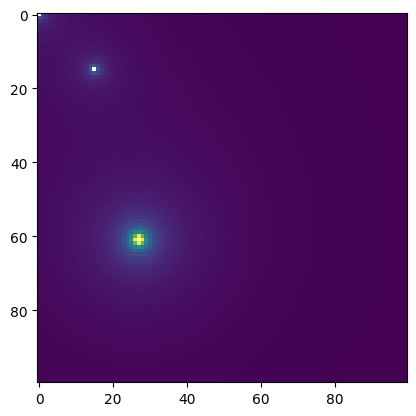

In [209]:
plt.imshow(resulting_V)
